In [17]:
import tensorboard
import tensorflow as tf
# tf.enable_eager_execution()
import matplotlib.pyplot as plt
import tempfile
import zipfile
import os

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

if tf.keras.backend.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
l = tf.keras.layers

model = tf.keras.Sequential([
    l.Conv2D(
        32, 5, padding='same', activation='relu', input_shape=input_shape),
    l.MaxPooling2D((2, 2), (2, 2), padding='same'),
    l.BatchNormalization(),
    l.Conv2D(64, 5, padding='same', activation='relu'),
    l.MaxPooling2D((2, 2), (2, 2), padding='same'),
    l.Flatten(),
    l.Dense(1024, activation='relu'),
    l.Dropout(0.4),
    l.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3

In [7]:
logdir = tempfile.mkdtemp()
print('Writing training logs to ' + logdir)

Writing training logs to /var/folders/3z/ypyn3g_n3nb718ycdz3w1rfwgztvtm/T/tmp7fllkzkz


In [8]:
%tensorboard --logdir={logdir}

UsageError: Line magic function `%tensorboard` not found.


In [18]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir, profile_batch=0)]

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 711us/sample - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.0505 - val_accuracy: 0.9900
Epoch 2/10
60000/60000 [==============================] - 42s 700us/sample - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0606 - val_accuracy: 0.9917
Epoch 3/10
60000/60000 [==============================] - 41s 688us/sample - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0684 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0715 - val_accuracy: 0.9893
Epoch 5/10
60000/60000 [==============================] - 41s 683us/sample - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0566 - val_accuracy: 0.9910
Epoch 6/10
60000/60000 [==============================] - 43s 719us/sample - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0521 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


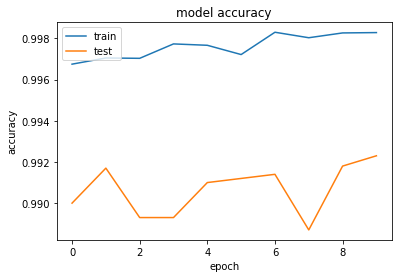

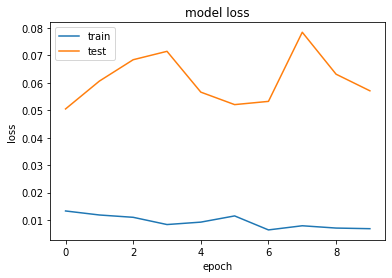

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()